### **Dataset: GoEmotions**

*GoEmotions* is a corpus of 58k carefully curated comments extracted from Reddit, with human annotations to 27 emotion categories or Neutral.

Number of examples: 58,009.
Number of labels: 27 + Neutral.

The data has already been separated in train, test and validation sets

Size of training dataset: 43,410.

Size of test dataset: 5,427.

Size of validation dataset: 5,426.

The emotion categories are: admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise.

Importing libraries and importing data

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [25]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [26]:
# Here we import everything we need for the project

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
#import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

from googletrans import Translator

print(tf.__version__)

2.13.0


In [27]:
# Importing raw comments and labels
df_train = pd.read_csv('train.tsv', sep='\t', header=None, names=['Text', 'GE_indices', 'Id']).drop('Id', axis=1)


In [28]:
print(df_train.shape)

(43410, 2)


In [29]:
df_val = pd.read_csv('dev.tsv', sep='\t', header=None, names=['Text', 'GE_indices', 'Id']).drop('Id', axis=1)
df_test = pd.read_csv('test.tsv', sep='\t', header=None, names=['Text', 'GE_indices', 'Id']).drop('Id', axis=1)

In [30]:
# Preview of what data has been saved in the above variables
df_train

,Text,GE_indices
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3
...,...,...
43405,Added you mate well I’ve just got the bow and ...,18
43406,Always thought that was funny but is it a refe...,6
43407,What are you talking about? Anything bad that ...,3
43408,"More like a baptism, with sexy results!",13


In [31]:
df_test

,Text,GE_indices
0,I’m really sorry about your situation :( Altho...,25
1,It's wonderful because it's awful. At not with.,0
2,"Kings fan here, good luck to you guys! Will be...",13
3,"I didn't know that, thank you for teaching me ...",15
4,They got bored from haunting earth for thousan...,27
...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15
5423,Well that makes sense.,4
5424,Daddy issues [NAME],27
5425,So glad I discovered that subreddit a couple m...,0


In [32]:
df_val

,Text,GE_indices
0,Is this in New Orleans?? I really feel like th...,27
1,"You know the answer man, you are programmed to...","4,27"
2,I've never been this sad in my life!,25
3,The economy is heavily controlled and subsidiz...,"4,27"
4,He could have easily taken a real camera from ...,20
...,...,...
5421,It's pretty dangerous when the state decides w...,14
5422,I filed for divorce this morning. Hoping he mo...,20
5423,"The last time it happened I just said, ""No"" an...",10
5424,I can’t stand this arrogant prick he’s no bett...,3


Finding out how much percentage of data is represented by each

In [33]:
# Defining the number of samples in train, validation and test dataset
size_train = df_train.shape[0]
size_val = df_val.shape[0]
size_test = df_test.shape[0]

# Defining the total number of samples
size_all = size_train + size_val + size_test

In [34]:
# Shape of train, validation and test datasets
print("Train dataset has {} samples and represents {:.2f}% of overall data".format(size_train, size_train/size_all*100))
print("Validation dataset has {} samples and represents {:.2f}% of overall data".format(size_val, size_val/size_all*100))
print("Test dataset has {} samples and represents {:.2f}% of overall data".format(size_test, size_test/size_all*100))
print()
print("The total number of samples is : {}".format(size_all))

Train dataset has 43410 samples and represents 80.00% of overall data
Validation dataset has 5426 samples and represents 10.00% of overall data
Test dataset has 5427 samples and represents 10.00% of overall data

The total number of samples is : 54263


Finding out number of emotions in the dataset

In [35]:
#For datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        43410 non-null  object
 1   GE_indices  43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


Now, emotions.txt has all the set of emotions that this dataset contains.

Each emotion is mapped to a number as well, according to the sequence it is in, in the emotions.txt text file

In [36]:
# Loading emotion labels for classification of emotions in GoEmotions dataset
with open("emotions.txt", "r") as file:
    GE_class = file.read().split("\n")

print(GE_class)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [37]:
GE_class[25]

'sadness'

In [38]:
print(len(GE_class))

28


Hence, there are 28 emotions, including 'neutral'

In [39]:
#Counting the number of values under each emotion category
df_train.GE_indices.value_counts()

GE_indices
27           12823
0             2710
4             1873
15            1857
1             1652
             ...  
6,15,22          1
9,10,19          1
7,10,25          1
7,9,24,25        1
0,1,18           1
Name: count, Length: 711, dtype: int64

###Lambda Functions

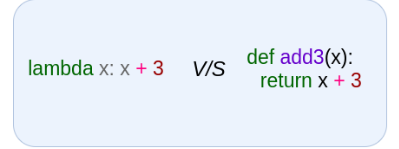

They can have any number of arguments but only one expression.

Before we start to further process the data, we will first have to combine all the three datasets into one and then proceed further

In [40]:
# Combining all the 3 datasets into 1 dataset
df_all = pd.concat([df_train, df_val, df_test], axis=0).reset_index(drop=True)

# Preview of data
display(df_all.head(3))

print(df_all.shape)

,Text,GE_indices
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2


(54263, 2)


Next, we will have to map each GE_indices to it's corresponding emotion in the emotions.txt file

For that, let's first convert these GE_indices into a list of indices which we will then map to the emotions.txt file and extract the emotion labels from the file

In [101]:
# We will use a lambda function here to make things easier
#df_all['GE_indices'] = df_all['GE_indices'].apply(lambda x: x.split(','))

In [41]:
# Viewing the data for results
print(df_all.head)

<bound method NDFrame.head of                                                     Text GE_indices
0      My favourite food is anything I didn't have to...         27
1      Now if he does off himself, everyone will thin...         27
2                         WHY THE FUCK IS BAYLESS ISOING          2
3                            To make her feel threatened         14
4                                 Dirty Southern Wankers          3
...                                                  ...        ...
54258  Thanks. I was diagnosed with BP 1 after the ho...         15
54259                             Well that makes sense.          4
54260                                Daddy issues [NAME]         27
54261  So glad I discovered that subreddit a couple m...          0
54262  Had to watch "Elmo in Grouchland" one time too...         27

[54263 rows x 2 columns]>


Next steps:
1. Determine which emotions we want
2. Drop accordingly
3. Tokenization
4. Embedding
5. Vectorization
6. Models building

In [18]:
df_all.isnull().sum()

Text          0
GE_indices    0
dtype: int64

In [19]:
df_all

,Text,GE_indices
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3
...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,15
54259,Well that makes sense.,4
54260,Daddy issues [NAME],27
54261,So glad I discovered that subreddit a couple m...,0


Dropping the un required emotions

In [105]:
j=['0','1','3','4','5','6','7','8','9','10','11','12','13','15','16','18','19','20','21','22','23','24','26','27']

In [104]:
# 2:anger, 9:disappointment, 14:fear, 17:joy, 26:surprise, 27:neutral
df_final2 = pd.DataFrame()
emotions_selected=['2','9','14','17','26','27']#

for i in range(6):
   df_final2=df_final2._append(df_all.loc[df_all['GE_indices'] == emotions_selected[i]])
   print(emotions_selected[i])

print (df_final2)

2
9
14
17
26
27
                                                    Text GE_indices
2                         WHY THE FUCK IS BAYLESS ISOING          2
17                                       Fucking coward.          2
25                 Stupidly stubborn / stubbornly stupid          2
30     Troll, bro. They know they're saying stupid sh...          2
116                                  The fuck is “mog?!”          2
...                                                  ...        ...
54254                             The essay is optional.         27
54256        Waiting for both of these things is torture         27
54257  Easy just include [NAME] to continue to tormen...         27
54260                                Daddy issues [NAME]         27
54262  Had to watch "Elmo in Grouchland" one time too...         27

[20681 rows x 2 columns]


In [105]:
df_final2.head()

,Text,GE_indices
2,WHY THE FUCK IS BAYLESS ISOING,2
17,Fucking coward.,2
25,Stupidly stubborn / stubbornly stupid,2
30,"Troll, bro. They know they're saying stupid sh...",2
116,The fuck is “mog?!”,2


In [106]:
one_hot_encoded_data = pd.get_dummies(df_final2, columns = ['GE_indices'])

In [107]:
one_hot_encoded_data.head()

,Text,GE_indices_14,GE_indices_17,GE_indices_2,GE_indices_26,GE_indices_27,GE_indices_9
2,WHY THE FUCK IS BAYLESS ISOING,False,False,True,False,False,False
17,Fucking coward.,False,False,True,False,False,False
25,Stupidly stubborn / stubbornly stupid,False,False,True,False,False,False
30,"Troll, bro. They know they're saying stupid sh...",False,False,True,False,False,False
116,The fuck is “mog?!”,False,False,True,False,False,False


In [108]:
one_hot_encoded_data.dtypes

Text             object
GE_indices_14      bool
GE_indices_17      bool
GE_indices_2       bool
GE_indices_26      bool
GE_indices_27      bool
GE_indices_9       bool
dtype: object

In [109]:
df_final2.GE_indices.value_counts()

GE_indices
27    16021
2      1265
17     1052
26      902
9       888
14      553
Name: count, dtype: int64

In [111]:
X = df_final2.iloc[:, 0].values
Y = one_hot_encoded_data.iloc[:, 1:7].values

In [112]:
X

array(['WHY THE FUCK IS BAYLESS ISOING', 'Fucking coward.',
       'Stupidly stubborn / stubbornly stupid', ...,
       'Easy just include [NAME] to continue to torment [NAME]',
       'Daddy issues [NAME]',
       'Had to watch "Elmo in Grouchland" one time too many when my kids were little...musical Elmo / Oscar overdose...'],
      dtype=object)

In [113]:
Y

array([[False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       ...,
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False]])

In [114]:
print(X.shape)
print(Y.shape)

(20681,)
(20681, 6)


###Split data  into training and validation sets


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(X,
                                                                           Y,
                                                                           test_size=0.1,#use 20%of training data for validation
                                                                           random_state=42)

In [117]:
len(train_sentences),len(train_labels),len(val_sentences), len(val_labels)

(18612, 18612, 2069, 2069)

In [118]:
#checking the samples
train_sentences[:10], train_labels[:10]

(array(['Unfortunately, we do not routinely keep 20 liters of fentanyl in the pharmacy,',
        '[NAME] instead of [NAME] for me, but glad to see [NAME] is doing well.',
        'They look purple on my screen. But yes, tacky.',
        'Holy fuck, report this now. The fuck you doing on reddit? ',
        'I actually found mine today! I will give it to my 1 year old',
        ' Their official logic is that it reduces turn-over, but yeah, the other reasons are kind of obvious.',
        'Is there a source link? Id like to put it as my screen saver :)',
        'FYI she’s probably cheating on someone, so didn’t want to post pics. ',
        'How dare you interrupt the circle jerk. Out, sir.',
        'The spouse sponsors them to guarantee that they are not a burden to the state. Nothing about this is related to committing a crime.'],
       dtype=object),
 array([[False, False, False, False,  True, False],
        [False,  True, False, False, False, False],
        [False, False, False,

##converting text to numbers
When dealing with text we needd to convert it into numbers

there are a few ways to do this
* Tokenisation- direct mapping of token(a token could be word or a character) to number
* Embedding - create a matrix of feature vector for each token (size of the feature vector can be defined and this embedding can be learned)

In [119]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [37]:
!pipinstall tensorflow===2.10.0

'pipinstall' is not recognized as an internal or external command,
operable program or batch file.


In [120]:
#using default textvectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)9

In [121]:
#find the average num of tokens in the training tweets
round(sum([len(i.split())for i in train_sentences ])/len(train_sentences))

12

In [122]:
#setup text vectorization variables
max_vocab_length=10000 # max num of words to have in our vocabulary
max_length= 100 #max length our sequences will be (eg how many words from a tweet does a model need to see)\

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_length)

In [123]:
#fit the text vecctorizer to the training text
text_vectorizer.adapt(train_sentences)

In [124]:
sample_sentence="Wow we are finally implenting! aren't we great"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[189,  43,  25, 620,   1, 380,  43, 392,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)>

In [125]:
import random
random_sentence=random.choice(train_sentences)
print(f"Original text; \n {random_sentence}\
        \n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text; 
 The dude even looks like [NAME]!        

 Vectorized version:


<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[  2, 211,  87, 138,  27,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)>

In [126]:
# Get the unique words in vocabulary
words_in_vocab= text_vectorizer.get_vocabulary()
top_5_words= words_in_vocab[:5]#get 5 most common
bottom_5_words= words_in_vocab[-5:]#get 5 least common
print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"5 most common words in vocab:{top_5_words}")
print(f"5 most least words in vocab:{bottom_5_words}")

Number of words in vocab:10000
5 most common words in vocab:['', '[UNK]', 'the', 'to', 'a']
5 most least words in vocab:['tua', 'ttgl', 'ttc', 'tsunderes', 'tsm']


##Creating embedding layer
using tensors flows embeding layer

In [127]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [128]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
And much like The Lions past, future and present it's not looking bright.      

Embedded version:


<tf.Tensor: shape=(1, 100, 128), dtype=float32, numpy=
array([[[ 0.04675734, -0.00284289,  0.03807788, ...,  0.00821386,
          0.02006057, -0.00358471],
        [-0.03699984, -0.01005615,  0.00360059, ..., -0.02572602,
         -0.03605258, -0.01067047],
        [ 0.03048461, -0.04675193, -0.02404611, ...,  0.00251601,
          0.01514297,  0.00864362],
        ...,
        [-0.03659074, -0.01150005, -0.02675479, ...,  0.04134076,
          0.04621175, -0.02526366],
        [-0.03659074, -0.01150005, -0.02675479, ...,  0.04134076,
          0.04621175, -0.02526366],
        [-0.03659074, -0.01150005, -0.02675479, ...,  0.04134076,
          0.04621175, -0.02526366]]], dtype=float32)>

In [129]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04675734, -0.00284289,  0.03807788,  0.02177956, -0.0123099 ,
         0.01262507, -0.03022153,  0.03008265,  0.03821318,  0.04164277,
         0.00959907,  0.00988804, -0.04491028,  0.0160881 , -0.04874025,
        -0.02223467,  0.01323253,  0.01534236,  0.04867727,  0.00121498,
         0.01974838, -0.03508626,  0.01540363,  0.03803864,  0.03683252,
        -0.00659827,  0.00505308,  0.02317145,  0.04371906,  0.00955402,
        -0.00958999, -0.04624399, -0.02399585,  0.01934614,  0.04316714,
        -0.02506992,  0.03225431,  0.0435049 ,  0.01446399,  0.04216905,
        -0.01963615, -0.04836488, -0.01920521, -0.02826532,  0.0057443 ,
         0.01880224,  0.02687768, -0.0167627 ,  0.02657074, -0.00358479,
        -0.0468533 ,  0.00950856, -0.00547479,  0.02608471, -0.03146863,
         0.01271112, -0.01671817,  0.03850157, -0.00190351, -0.00771978,
        -0.00656586,  0.01750262, -0.02722113,  0.0182342 , -0.00414765,
  

###Modelling a text dataset (running a series of experiements )

### Creating an evaluation function for our model experiments

We can evaluate all of our model's predictions with different metrics every single time, but that will become very cumbersome.

For this, we will create a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics: accuracy, precision, recall, f1 score

In [48]:
pip install wget

In [130]:
import wget
url="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
filename=wget.download(url)

In [131]:
# Download helper functions script
#wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
#import series of helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [132]:
# Function to evaluate: accuracy, precision, recall, f1 score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Parameters:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results
  # _ is used as an blank variable because we dont want 'support' which is a type of return in the function

##Model 1: A simple dense model
The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.


In [133]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\client\session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [134]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [137]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(6, activation="softmax")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [138]:
# Compile model
model_1.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [139]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 100)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 global_average_pooling1d_3  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1280774 (4.89 MB)
Trainable params: 128

In [140]:
train_sentences_list = train_sentences.tolist()

In [141]:
val_sentences_list = val_sentences.tolist()

In [142]:
print(train_sentences.shape)

(18612,)


In [143]:
type(train_labels)

numpy.ndarray

In [144]:
print(train_labels.shape)

(18612, 6)


In [145]:
len(train_labels)

18612

In [146]:
train_labels[0]='1'

In [147]:
train_labels

array([[ True,  True,  True,  True,  True,  True],
       [False,  True, False, False, False, False],
       [False, False, False, False,  True, False],
       ...,
       [False, False, False, False,  True, False],
       [False, False,  True, False, False, False],
       [False, False, False, False,  True, False]])

In [148]:
# Fit the model
model_1_history = model_1.fit(train_sentences, #input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231002-133146


Epoch 1/5
582/582 [==============================] - 33s 43ms/step - loss: 0.9491 - accuracy: 0.7666 - val_loss: 0.8762 - val_accuracy: 0.7753
Epoch 2/5
582/582 [==============================] - 26s 45ms/step - loss: 0.8590 - accuracy: 0.7746 - val_loss: 0.8495 - val_accuracy: 0.7753
Epoch 3/5
582/582 [==============================] - 30s 52ms/step - loss: 0.8194 - accuracy: 0.7746 - val_loss: 0.8121 - val_accuracy: 0.7753
Epoch 4/5
582/582 [==============================] - 23s 39ms/step - loss: 0.7621 - accuracy: 0.7759 - val_loss: 0.7697 - val_accuracy: 0.7796
Epoch 5/5
582/582 [==============================] - 24s 41ms/step - loss: 0.6965 - accuracy: 0.7852 - val_loss: 0.7255 - val_accuracy: 0.7864


In [149]:
# Fit the model
model_1_history = model_1.fit(train_sentences, #input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231002-133409
Epoch 1/10
582/582 [==============================] - 27s 40ms/step - loss: 0.6308 - accuracy: 0.8018 - val_loss: 0.6932 - val_accuracy: 0.7927
Epoch 2/10
582/582 [==============================] - 24s 41ms/step - loss: 0.5719 - accuracy: 0.8193 - val_loss: 0.6566 - val_accuracy: 0.8062
Epoch 3/10
582/582 [==============================] - 23s 40ms/step - loss: 0.5195 - accuracy: 0.8362 - val_loss: 0.6425 - val_accuracy: 0.8125
Epoch 4/10
582/582 [==============================] - 24s 41ms/step - loss: 0.4750 - accuracy: 0.8498 - val_loss: 0.6230 - val_accuracy: 0.8188
Epoch 5/10
582/582 [==============================] - 24s 40ms/step - loss: 0.4368 - accuracy: 0.8612 - val_loss: 0.6181 - val_accuracy: 0.8299
Epoch 6/10
582/582 [==============================] - 24s 41ms/step - loss: 0.4032 - accuracy: 0.8714 - val_loss: 0.6187 - val_accuracy: 0.8304
Epoch 7/10
582/582 [==============================] - 24s

In [150]:
# Check the results on the validation set
model_1.evaluate(val_sentences, val_labels)

65/65 [==============================] - 4s 4ms/step - loss: 0.6163 - accuracy: 0.8342


[0.6162972450256348, 0.8342194557189941]

In [151]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01749581,  0.01260641, -0.01870494, ...,  0.02141483,
          0.07239529, -0.00778649],
        [ 0.02234323,  0.08045591,  0.00493355, ...,  0.04392124,
          0.01940883,  0.11110722],
        [ 0.00588627,  0.07957175, -0.16530548, ...,  0.17074867,
         -0.02886324,  0.02415207],
        ...,
        [-0.15925863,  0.26103306,  0.27438253, ..., -0.30591372,
          0.23096189,  0.29640594],
        [-0.22708572,  0.34481058,  0.34810793, ..., -0.2953097 ,
          0.30620143,  0.33223784],
        [-0.25870195,  0.2530055 ,  0.33695683, ..., -0.2524075 ,
          0.30056027,  0.25313804]], dtype=float32)>]

In [152]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [153]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:20] # only print out the first 10 prediction probabilities

65/65 [==============================] - 4s 2ms/step


array([[6.72646146e-03, 6.73266128e-03, 1.72097869e-02, 1.96661986e-02,
        9.34183180e-01, 1.54817607e-02],
       [2.09653028e-03, 3.91698349e-03, 1.32487919e-02, 6.83992961e-03,
        9.68367815e-01, 5.52997040e-03],
       [1.02324180e-01, 1.31858774e-02, 6.08205236e-02, 2.42052693e-02,
        1.49467304e-01, 6.49996877e-01],
       [1.21550541e-02, 5.77107705e-02, 1.87415276e-02, 1.62808634e-02,
        8.69417727e-01, 2.56940685e-02],
       [7.61854416e-03, 8.10942985e-03, 5.10239713e-02, 1.59185063e-02,
        8.75872374e-01, 4.14571203e-02],
       [8.26168247e-03, 6.63280347e-03, 8.92902732e-01, 1.25561273e-02,
        6.98544458e-02, 9.79215093e-03],
       [8.98904353e-02, 7.34748304e-01, 8.48543830e-04, 3.13260891e-02,
        4.19635549e-02, 1.01223163e-01],
       [6.63992530e-03, 3.93430889e-03, 3.18254501e-01, 1.49365831e-02,
        6.33677661e-01, 2.25569997e-02],
       [3.34010310e-02, 2.16732807e-02, 1.53592583e-02, 5.21099903e-02,
        7.74931908e-01, 

In [155]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [156]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 81.15031416143064,
 'precision': 0.8370417508397358,
 'recall': 0.8115031416143065,
 'f1': 0.8054798017975526}

###Model 2: LSTM

In [157]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(6, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 100, 128)
(None, 64)


In [158]:
# Compile model
model_2.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [159]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 100)               0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1329798 (5.07 MB)
Trainable params: 1329798 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [160]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231002-134152
Epoch 1/5
582/582 [==============================] - 60s 89ms/step - loss: 0.9074 - accuracy: 0.7732 - val_loss: 0.8960 - val_accuracy: 0.7753
Epoch 2/5
582/582 [==============================] - 52s 89ms/step - loss: 0.8916 - accuracy: 0.7746 - val_loss: 0.8931 - val_accuracy: 0.7753
Epoch 3/5
582/582 [==============================] - 51s 88ms/step - loss: 0.8909 - accuracy: 0.7746 - val_loss: 0.8958 - val_accuracy: 0.7753
Epoch 4/5
582/582 [==============================] - 52s 90ms/step - loss: 0.8906 - accuracy: 0.7746 - val_loss: 0.8962 - val_accuracy: 0.7753
Epoch 5/5
582/582 [==============================] - 58s 100ms/step - loss: 0.8905 - accuracy: 0.7746 - val_loss: 0.8969 - val_accuracy: 0.7753


In [161]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231002-134629
Epoch 1/10
582/582 [==============================] - 98s 156ms/step - loss: 0.8906 - accuracy: 0.7746 - val_loss: 0.8942 - val_accuracy: 0.7753
Epoch 2/10
582/582 [==============================] - 86s 148ms/step - loss: 0.8906 - accuracy: 0.7746 - val_loss: 0.8935 - val_accuracy: 0.7753
Epoch 3/10
582/582 [==============================] - 126s 217ms/step - loss: 0.8902 - accuracy: 0.7746 - val_loss: 0.8955 - val_accuracy: 0.7753
Epoch 4/10
582/582 [==============================] - 76s 130ms/step - loss: 0.8903 - accuracy: 0.7746 - val_loss: 0.8955 - val_accuracy: 0.7753
Epoch 5/10
582/582 [==============================] - 67s 115ms/step - loss: 0.8902 - accuracy: 0.7746 - val_loss: 0.8960 - val_accuracy: 0.7753
Epoch 6/10
582/582 [==============================] - 67s 115ms/step - loss: 0.8905 - accuracy: 0.7746 - val_loss: 0.8961 - val_accuracy: 0.7753
Epoch 7/10
582/582 [==============================] - 62s 107ms/

In [162]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
#model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

65/65 [==============================] - 7s 19ms/step


In [163]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:20]

<tf.Tensor: shape=(20, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [164]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 77.52537457709037,
 'precision': 0.6010183703318172,
 'recall': 0.7752537457709038,
 'f1': 0.6771070014791885}

###Model 3: GRU

In [165]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(128)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(6, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [166]:
# Compile GRU model
model_3.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [167]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 100)               0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1379846 (5.26 MB)
Trainable params: 1379846 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [168]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=4,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231002-140001
Epoch 1/4
582/582 [==============================] - 77s 121ms/step - loss: 0.9078 - accuracy: 0.7732 - val_loss: 0.9031 - val_accuracy: 0.7753
Epoch 2/4
582/582 [==============================] - 95s 164ms/step - loss: 0.8945 - accuracy: 0.7746 - val_loss: 0.8936 - val_accuracy: 0.7753
Epoch 3/4
582/582 [==============================] - 84s 143ms/step - loss: 0.8927 - accuracy: 0.7746 - val_loss: 0.8965 - val_accuracy: 0.7753
Epoch 4/4
582/582 [==============================] - 89s 154ms/step - loss: 0.8920 - accuracy: 0.7746 - val_loss: 0.9016 - val_accuracy: 0.7753


In [169]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231002-140757
Epoch 1/10


KeyboardInterrupt: 

In [170]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

65/65 [==============================] - 6s 25ms/step


((2069, 6),
 array([[0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890004],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890004],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003],
        [0.01751247, 0.04189602, 0.03979018, 0.03681311, 0.8250881 ,
         0.03890003]], dtype=float32))

In [171]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [172]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

c:\Users\nishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 77.52537457709037,
 'precision': 0.6010183703318172,
 'recall': 0.7752537457709038,
 'f1': 0.6771070014791885}

###Model 4: Bidirectonal RNN model

In [173]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(6, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [174]:
# Compile
model_4.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [175]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 100)               0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1379590 (5.26 MB)
Trainable par

In [190]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=4,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231002-142807
Epoch 1/4
582/582 [==============================] - 77s 128ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 1.1926 - val_accuracy: 0.8096
Epoch 2/4
582/582 [==============================] - 71s 122ms/step - loss: 0.0434 - accuracy: 0.9872 - val_loss: 1.1430 - val_accuracy: 0.7960
Epoch 3/4
582/582 [==============================] - 76s 131ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 1.2891 - val_accuracy: 0.8043
Epoch 4/4
582/582 [==============================] - 76s 131ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 1.2877 - val_accuracy: 0.7864


In [179]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=7,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231002-141541
Epoch 1/7
582/582 [==============================] - 107s 178ms/step - loss: 0.1710 - accuracy: 0.9450 - val_loss: 0.7161 - val_accuracy: 0.8342
Epoch 2/7
582/582 [==============================] - 92s 158ms/step - loss: 0.1331 - accuracy: 0.9591 - val_loss: 0.7379 - val_accuracy: 0.8255
Epoch 3/7
582/582 [==============================] - 81s 139ms/step - loss: 0.1039 - accuracy: 0.9681 - val_loss: 0.7778 - val_accuracy: 0.8173
Epoch 4/7
582/582 [==============================] - 83s 142ms/step - loss: 0.0872 - accuracy: 0.9734 - val_loss: 0.9164 - val_accuracy: 0.8197
Epoch 5/7
582/582 [==============================] - 85s 146ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.9976 - val_accuracy: 0.8057
Epoch 6/7
582/582 [==============================] - 81s 139ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 1.0834 - val_accuracy: 0.7999
Epoch 7/7
582/582 [==============================] - 98s 

In [191]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

65/65 [==============================] - 5s 24ms/step


array([[1.27472163e-06, 2.02283372e-05, 3.62192941e-06, 2.04213466e-02,
        9.79477525e-01, 7.59564136e-05],
       [1.08200754e-06, 3.98605662e-05, 5.24685020e-04, 7.86912005e-06,
        9.99256432e-01, 1.70107814e-04],
       [3.58212528e-05, 5.41646659e-05, 4.30445973e-04, 2.48341530e-05,
        2.87045818e-02, 9.70750093e-01],
       [1.12806032e-04, 1.36321655e-03, 1.51202854e-04, 5.09037403e-03,
        9.93263304e-01, 1.90698702e-05],
       [4.60788556e-07, 3.00238753e-06, 1.66061964e-05, 6.80627409e-07,
        9.99976873e-01, 2.36966298e-06],
       [8.65849688e-06, 3.34758420e-06, 9.91882622e-01, 4.70884734e-05,
        8.00908823e-03, 4.92014478e-05],
       [2.40945183e-02, 9.65341508e-01, 1.99965107e-05, 3.80170392e-03,
        4.80216835e-03, 1.94012851e-03],
       [6.96788948e-06, 8.49356275e-06, 6.81178153e-01, 4.11829315e-05,
        3.17246169e-01, 1.51902193e-03],
       [3.10799049e-04, 1.15766056e-01, 1.20359015e-04, 1.21650904e-04,
        8.81471217e-01, 

In [192]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [193]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 78.10536491058483,
 'precision': 0.7920895908849387,
 'recall': 0.7810536491058483,
 'f1': 0.7848738146068309}

In [183]:
model_1_results

{'accuracy': 81.15031416143064,
 'precision': 0.8370417508397358,
 'recall': 0.8115031416143065,
 'f1': 0.8054798017975526}

In [184]:
model_2_results

{'accuracy': 77.52537457709037,
 'precision': 0.6010183703318172,
 'recall': 0.7752537457709038,
 'f1': 0.6771070014791885}

In [185]:
model_3_results

{'accuracy': 77.52537457709037,
 'precision': 0.6010183703318172,
 'recall': 0.7752537457709038,
 'f1': 0.6771070014791885}

In [186]:
model_4_results

{'accuracy': 80.95698405026583,
 'precision': 0.8020115068954726,
 'recall': 0.8095698405026583,
 'f1': 0.8023252964813339}

In [196]:
# 2:anger, 9:disappointment, 14:fear, 17:joy, 26:surprise, 27:neutral
sen=['i am scared','i am happy','i am angry', 'i am surprised','i am disappointed']
guess=model_4.predict(sen)
guess

1/1 [==============================] - 3s 3s/step


array([[9.9717760e-01, 1.2619295e-03, 1.5097355e-05, 2.9596410e-04,
        1.9788225e-04, 1.0514916e-03],
       [8.5296415e-06, 9.9933404e-01, 5.6285517e-06, 1.8441358e-05,
        4.5107582e-04, 1.8216284e-04],
       [4.5085912e-05, 2.1684601e-04, 9.5594460e-01, 2.5521434e-04,
        3.9642613e-02, 3.8956439e-03],
       [5.3788413e-06, 1.4964856e-05, 1.8565357e-06, 9.9891913e-01,
        8.6639315e-04, 1.9222761e-04],
       [2.0064172e-05, 9.6673250e-07, 3.2276764e-06, 5.8622646e-07,
        1.6004953e-04, 9.9981517e-01]], dtype=float32)

In [197]:
tf.squeeze(tf.round(guess))


<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
#14-fear, 17-joy, 2-angry, 25- sadnessS

In [ ]:
def translate_text(text, target_language='en'):
    # Initialize the translator
    translator = Translator()

    # Translate the text to the target language
    translation = translator.translate(text, dest=target_language)

    return translation.text


In [189]:
sen=input("Please enter a sentence: ")
def analysis(sentence):
   print("Sentence has been passed")
   print(sentence)
   # translated_input= translate_text(sentence, target_language='en')
   answer= model_4.predict(sentence)
   result=tf.squeeze(tf.round(answer))
   print(result)
   
   first_element = result[0]
   second_element = result[1]
   third_element = result[2]
   fourth_element = result[3]
   fifth_element = result[4]
   sixth_element = result[5]
   

   if(first_element==1 and second_element==0 and third_element==0 and fourth_element==0 and fifth_element==0 and sixth_element==0):
      return("Fear")
   elif(first_element==0 and second_element==1 and third_element==0 and fourth_element==0 and fifth_element==0 and sixth_element==0):
      return("Joy")
   elif(first_element==0 and second_element==0 and third_element==1 and fourth_element==0 and fifth_element==0 and sixth_element==0):
      return("Angry")
   elif(first_element==0 and second_element==0 and third_element==0 and fourth_element==1 and fifth_element==0 and sixth_element==0):
      return("Surprise")
   elif(first_element==0 and second_element==0 and third_element==0 and fourth_element==0 and fifth_element==1 and sixth_element==0):
      return("Neutral")
   else:return("Disappointed")
   
answer1 = analysis([sen])
print("answer: ", answer1)
   

Sentence has been passed
['i am so happy']
1/1 [==============================] - 3s 3s/step
tf.Tensor([0. 1. 0. 0. 0. 0.], shape=(6,), dtype=float32)
answer:  Joy
